In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
import seaborn as sns
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
# Coffee roast data
x = np.array([[185.32,  12.69],
       [259.92,  11.87],
       [231.01,  14.41],
       [175.37,  11.72],
       [187.12,  14.13],
       [225.91,  12.1 ],
       [208.41,  14.18],
       [207.08,  14.03],
       [280.6 ,  14.23],
       [202.87,  12.25],
       [196.7 ,  13.54],
       [270.31,  14.6 ],
       [192.95,  15.2 ],
       [213.57,  14.28],
       [164.47,  11.92],
       [177.26,  15.04],
       [241.77,  14.9 ],
       [237.  ,  13.13],
       [219.74,  13.87],
       [266.39,  13.25],
       [270.45,  13.95],
       [261.96,  13.49],
       [243.49,  12.86],
       [220.58,  12.36],
       [163.59,  11.65],
       [244.76,  13.33],
       [271.19,  14.84],
       [201.99,  15.39],
       [229.93,  14.56],
       [204.97,  12.28],
       [173.19,  12.22],
       [231.51,  11.95],
       [152.69,  14.83],
       [163.42,  13.3 ],
       [215.95,  13.98],
       [218.04,  15.25],
       [251.3 ,  13.8 ],
       [233.33,  13.53],
       [280.24,  12.41],
       [243.02,  13.72],
       [155.67,  12.68],
       [275.17,  14.64],
       [151.73,  12.69],
       [151.32,  14.81],
       [164.9 ,  11.73],
       [282.55,  13.28],
       [192.98,  11.7 ],
       [202.6 ,  12.96],
       [220.67,  11.53],
       [169.97,  12.34],
       [209.47,  12.71],
       [232.8 ,  12.64],
       [272.8 ,  15.35],
       [158.02,  12.34],
       [226.01,  14.58],
       [158.64,  12.24],
       [211.66,  14.17],
       [271.95,  14.97],
       [257.16,  11.71],
       [281.85,  13.96],
       [161.63,  12.52],
       [233.8 ,  13.04],
       [210.29,  14.72],
       [261.24,  13.69],
       [256.98,  13.12],
       [281.56,  13.92],
       [280.64,  11.68],
       [269.16,  13.74],
       [246.34,  12.27],
       [224.07,  12.66],
       [164.24,  11.51],
       [272.42,  14.18],
       [177.68,  12.53],
       [212.86,  14.77],
       [165.88,  15.37],
       [277.43,  12.48],
       [236.51,  12.94],
       [244.14,  11.85],
       [213.45,  13.85],
       [234.57,  14.27],
       [270.34,  12.47],
       [170.68,  13.06],
       [226.79,  15.34],
       [245.92,  14.45],
       [281.32,  12.57],
       [185.03,  13.19],
       [189.88,  14.1 ],
       [278.48,  12.11],
       [219.92,  14.21],
       [216.58,  15.15],
       [249.48,  15.03],
       [165.09,  12.28],
       [158.87,  14.82],
       [279.98,  11.56],
       [256.55,  14.41],
       [272.61,  12.58],
       [246.49,  12.45],
       [160.26,  14.48],
       [155.7 ,  14.3 ],
       [188.27,  13.45],
       [270.36,  12.47],
       [213.22,  12.92],
       [175.7 ,  13.39],
       [174.52,  14.7 ],
       [233.  ,  12.63],
       [281.37,  12.88],
       [240.62,  14.43],
       [185.81,  11.55],
       [270.5 ,  15.33],
       [172.98,  12.11],
       [208.41,  13.89],
       [283.51,  15.35],
       [283.36,  12.48],
       [230.85,  13.24],
       [181.24,  11.76],
       [172.78,  12.93],
       [161.88,  12.1 ],
       [156.03,  13.99],
       [216.52,  12.47],
       [221.06,  13.2 ],
       [238.99,  15.23],
       [197.69,  14.08],
       [179.55,  15.26],
       [233.39,  12.13],
       [184.7 ,  12.14],
       [174.18,  12.73],
       [261.11,  13.33],
       [187.42,  13.18],
       [186.1 ,  14.43],
       [157.94,  12.66],
       [193.64,  12.23],
       [249.65,  12.22],
       [190.56,  11.73],
       [252.  ,  12.96],
       [238.55,  12.37],
       [152.94,  12.79],
       [255.17,  14.85],
       [197.09,  14.89],
       [156.8 ,  13.59],
       [184.75,  13.26],
       [179.92,  15.07],
       [190.79,  15.28],
       [164.73,  13.22],
       [209.87,  14.34],
       [196.58,  13.47],
       [159.51,  12.74],
       [247.87,  11.92],
       [212.44,  12.45],
       [172.34,  11.99],
       [259.87,  14.25],
       [201.23,  13.07],
       [248.34,  13.92],
       [273.66,  15.18],
       [215.09,  14.14],
       [223.53,  12.74],
       [211.22,  14.38],
       [224.61,  14.03],
       [215.75,  15.31],
       [254.82,  12.02],
       [259.9 ,  15.17],
       [260.25,  12.87],
       [199.67,  12.47],
       [157.52,  13.39],
       [264.81,  14.58],
       [239.4 ,  14.89],
       [238.98,  12.39],
       [258.43,  12.97],
       [270.16,  12.81],
       [162.41,  14.42],
       [164.53,  14.98],
       [205.61,  14.62],
       [157.1 ,  13.68],
       [241.38,  12.02],
       [232.13,  12.07],
       [191.04,  12.96],
       [233.64,  12.02],
       [174.95,  14.63],
       [246.64,  13.32],
       [188.07,  14.27],
       [213.16,  12.75],
       [268.08,  12.31],
       [258.58,  13.97],
       [237.21,  14.23],
       [251.02,  15.02],
       [274.28,  12.52],
       [172.12,  15.09],
       [177.52,  12.39],
       [258.71,  15.36],
       [264.01,  13.57],
       [200.71,  15.45],
       [249.37,  14.02],
       [151.5 ,  12.28],
       [151.82,  15.13],
       [181.92,  12.18],
       [228.65,  12.31],
       [223.78,  15.3 ],
       [266.63,  12.48],
       [273.68,  13.1 ],
       [220.61,  12.8 ],
       [284.99,  12.73]])
y = np.array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [3]:
print(x.shape, y.shape)

(200, 2) (200, 1)


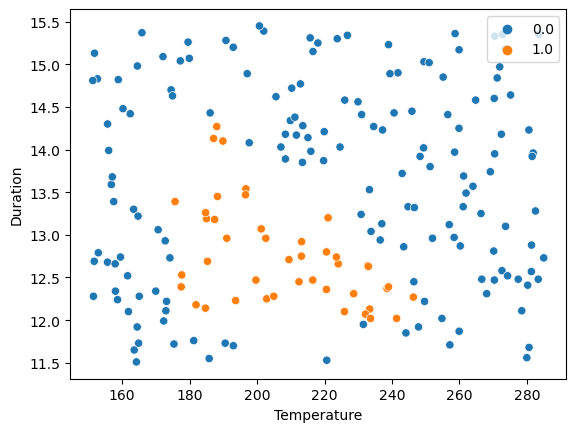

In [29]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y[:,0])
plt.xlabel("Temperature")
plt.ylabel("Duration")
plt.legend(loc=1)

In [31]:
print(f"Temperature Max, Min pre normalization: {np.max(x[:,0]):0.2f}, {np.min(x[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(x[:,1]):0.2f}, {np.min(x[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(x)  # learns mean, variance
Xn = norm_l(x)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [33]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(y,(1000,1))   
print(Xt.shape, Yt.shape) 

(200000, 2) (200000, 1)


In [35]:
# Tensorflow model

In [38]:
tf.random.set_seed(1234)
model = Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(3, activation='sigmoid', name='layer1'),
    Dense(1, activation='sigmoid', name='layer2')
])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


In [42]:
w1, b1 = model.get_layer('layer1').get_weights()
w2, b2 = model.get_layer('layer2').get_weights()
print(f"W1{w1.shape}:\n", w1, f"\nb1{b1.shape}:", b1)
print(f"W2{w2.shape}:\n", w2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.3396417  -0.35001063 -0.50814104]
 [ 0.7146162   0.97153974  0.06463003]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.48710567]
 [-0.246871  ]
 [ 0.74678206]] 
b2(1,): [0.]


In [43]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.2182
Epoch 2/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.1319
Epoch 3/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.1207
Epoch 4/10
6250/6250 [==============================] - 9s 2ms/step - loss: 0.1070
Epoch 5/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0255
Epoch 6/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0141
Epoch 7/10
6250/6250 [==============================] - 9s 2ms/step - loss: 0.0097
Epoch 8/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0070
Epoch 9/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0052
Epoch 10/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0039


In [45]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 0.08165872 14.101828   12.444341  ]
 [-8.558273   11.746361    0.31700927]] 
b1: [-10.767904    1.6105624  12.966581 ]
W2:
 [[-39.482006]
 [-39.764305]
 [ 33.96423 ]] 
b2: [-11.019577]


In [46]:
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])

# Replace the weights from your trained model with
# the values above.
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])

In [47]:
# Check if the weights are successfully replaced
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-8.94  0.29 12.89]
 [-0.17 -7.34 10.79]] 
b1: [-9.87 -9.28  1.01]
W2:
 [[-31.38]
 [-27.86]
 [-32.79]] 
b2: [15.54]


In [50]:
# Predcition
x_test = np.array([
    [200,13.9], # pos ex
    [200,17] # neg ex
])
x_testn = norm_l(x_test)
prediction = model.predict(x_testn)
print("Prediction = \n", prediction)

1/1 [==============================] - 0s 21ms/step
Prediction = 
 [[9.620412e-01]
 [3.031629e-08]]


In [52]:
yhat = np.zeros_like(prediction)
for i in range(len(prediction)):
    if prediction[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [54]:
yhat = (prediction >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]
